## 04 - Modelling

## Setting up Colab Environment if in Colab
The analyses outlined in this notebook relies on the estimators provided by the RAPIDS AI CUML library (https://docs.rapids.ai/api), which provides a sci-kit learn-like API for implementations of machine learning algorithms that are specifically configured to run on GPU hardware. Using this library will significantly speed up the computation time associated with the dimensionality reduction we conduct towards the end of this notebook.

As I do not personally have access to a GPU, the GPU-enabled part of this notebook is run on Google's Colab Notebook environment, which offers GPU access for free. In the cell belows below, we define the functions required to setup a 25GB RAM Colab Notebook Environment with the packages necessary for the code to function.

## Optional - Colab Setup

In [ ]:
def upgrade_runtime_ram():
    meminfo = subprocess.getoutput('cat /proc/meminfo').split('\n')

    memory_info = {entry.split(':')[0]: int(entry.split(':')[1].replace(' kB','').strip()) for entry in meminfo}

    if memory_info['MemTotal'] > 17000000:
        return

    a = []
    while(1):
        a.append('1')

In [ ]:
def restart_runtime():
    os.kill(os.getpid(), 9)

In [ ]:
def setup_rapids():
    pynvml.nvmlInit()
    handle = pynvml.nvmlDeviceGetHandleByIndex(0)
    device_name = pynvml.nvmlDeviceGetName(handle)
    if (device_name != b'Tesla T4') and (device_name != b'Tesla P4') and (device_name != b'Tesla P100-PCIE-16GB'):
        print("Wrong GPU - Restarting Runtime")
        restart_runtime()


    # clone RAPIDS AI rapidsai-csp-utils scripts repo
    !git clone https://github.com/rapidsai/rapidsai-csp-utils.git

    # install RAPIDS
    !bash rapidsai-csp-utils/colab/rapids-colab.sh 0.13


    # set necessary environment variables 
    dist_package_index = sys.path.index('/usr/local/lib/python3.6/dist-packages')
    sys.path = sys.path[:dist_package_index] + ['/usr/local/lib/python3.6/site-packages'] + sys.path[dist_package_index:]
    sys.path

    # update pyarrow & modules 
    exec(open('rapidsai-csp-utils/colab/update_modules.py').read(), globals())

In [ ]:
def setup_conda():
    if not 'Miniconda3-4.5.4-Linux-x86_64.sh' in os.listdir():
        !wget https://repo.continuum.io/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh && bash Miniconda3-4.5.4-Linux-x86_64.sh -bfp /usr/local

    if not ('EPFL-Capstone-Project' in os.listdir()) and (os.getcwd().split('/')[-1] != 'EPFL-Capstone-Project'):
        !git clone https://github.com/helmigsimon/EPFL-Capstone-Project  
    if 'EPFL-Capstone-Project' in os.listdir():
        os.chdir('EPFL-Capstone-Project')

    !conda env create -f environment.yml
    !conda activate exts-ml

In [ ]:
def setup_drive():
    #Mounting Google Drive
    global drive
    from google.colab import drive
    drive.mount('/content/drive')

In [6]:
try:
    import sys,os,subprocess
    
    upgrade_runtime_ram()
    setup_drive()

    #Setting up PyPi Packages
    !pip install geopandas sparse-dot-topn pdpipe category-encoders catboost xgboost
    import geopandas as gpd
    import sparse_dot_topn.sparse_dot_topn as ct
    import pdpipe as pdp
    import category_encoders
    import xgboost as xgb

    #Setting up Conda Packages
    setup_conda()
    
    #Initializing NLTK
    import nltk
    nltk.download('stopwords')
    nltk.download('punkt')
    
    #Setting up RAPIDS AI
    import pynvml
    setup_rapids()
    
    from cuml import UMAP
    
except ModuleNotFoundError as e:
    print(e)
    print('Not in colab environment, continuing to run locally')
    from umap import UMAP

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
  Using cached geopandas-0.7.0-py2.py3-none-any.whl (928 kB)
Processing /root/.cache/pip/wheels/aa/e7/c7/e64559d518bcc12ed7e40a605ae304259b957ae8181c8d1e82/sparse_dot_topn-0.2.9-cp36-cp36m-linux_x86_64.whl
  Using cached pdpipe-0.0.49-py3-none-any.whl (48 kB)
  Using cached category_encoders-2.2.2-py2.py3-none-any.whl (80 kB)
  Using cached catboost-0.23.2-cp36-none-manylinux1_x86_64.whl (64.8 MB)
     |████████████████████████████████| 127.6 MB 6.1 kB/s 
     |████████████████████████████████| 1.8 MB 62.0 MB/s 
  Using cached Fiona-1.8.13.post1-cp36-cp36m-manylinux1_x86_64.whl (14.7 MB)
  Using cached pyproj-2.6.1.post1-cp36-cp36m-manylinux2010_x86_64.whl (10.9 MB)
     |████████████████████████████████| 2.0 MB 60.5 MB/s 
  Using cached strct-0.0.30-py2.py3-none-any.whl (16 kB)
     |████████████████████████████████| 63 kB 2.5 MB/s 
  Using cached skutil-0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Solving environment: failed

ResolvePackageNotFound: 
  - libllvm8==8.0.1=h770b8ee_0
  - tk==8.6.10=hbbe82c9_0
  - libdap4==3.20.4=habf5908_0
  - hdf5==1.10.5=nompi_h3e39495_1104
  - kealib==1.4.12=h2324030_0
  - libgdal==3.0.4=hec54991_3
  - pcre==8.44=h4a8c4bd_0
  - sqlalchemy==1.3.13=py36h0b31af3_0
  - fontconfig==2.13.1=h6b1039f_1001
  - lz4-c==1.8.3=h6de7cb9_1001
  - python==3.6.10=hce46be0_1009_cpython
  - libtiff==4.1.0=ha78913b_3
  - graphviz==2.42.3=h98dfb87_0
  - llvmlite==0.31.0=py36hde82470_1
  - c-ares==1.15.0=h01d97ff_1001
  - libopenblas==0.3.9=h3d69b6c_0
  - icu==64.2=h6de7cb9_1
  - libcurl==7.68.0=h709d2b2_0
  - jpeg==9c=h1de35cc_1001
  - tiledb==1.7.0=hd5e958f_2
  - fiona==1.8.13=py36he71f6a4_0
  - libgfortran==4.0.0=2
  - zeromq==4.3.2=h6de7cb9_2
  - geos==3.8.1=h4a8c4bd_0
  - libiconv==1.15=h0b31af3_1006
  - libssh2==1.8.2=hcdc9a53_2
  - libkml==1.3.0=h169b8f9_1011
  - libpng==1.6.37=hbbe82c9_1
  - xerces-c==3.2.2=h8f8adb3_1004
  - libffi==3.2.1=h4a8c4bd_1007
  - sq

## Imports

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split,  StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
tqdm.pandas()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, RobustScaler, MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA

In [ ]:
from lib.transformers import *
from lib.pipelines import *
from lib.processing import save_to_pkl, load_from_pkl
from lib.visualization import GridSearchPlotter
from data.util.paths import DATA_PATH

In [ ]:
from category_encoders.leave_one_out import LeaveOneOutEncoder

In [ ]:
from cuml import LinearRegression, RandomForestRegressor, Ridge, Lasso

In [ ]:
from catboost import CatBoostRegressor

## Loading Data
First, we load the dataset that we have prepared in the previous notebook, ``03-DatasetPrep``

In [ ]:
metadata_df, image_embeddings_df = tuple(load_from_pkl(i,DATA_PATH) for i in ('metadata','image_embeddings'))
df = metadata_df.merge(image_embeddings_df,how='inner',on='release_id')

After merging, we will take care of additional outliers that need to be addressed, namely for ``number_of_tracks``, ``running_time``, and the UMAP dimensionality reduction outputs, which were discussed in 02-Visualization&Cleaning. ``number_of_tracks`` and ``running_time`` suffer from massive outlier values which skew the distribution of the features and as such must be taken out of contention. For the case of ``running_time``, we remove those albums with that last over 3 hours, in the interest of focusing our attention on albums of a normal length.

In [ ]:
df = OutlierRemover(features=['number_of_tracks'] + [i for i in df.columns if 'umap' in i]).fit_transform(df[(df['running_time'] < 180) | (df['running_time'].isna())])

In [ ]:
del metadata_df, image_embeddings_df

In [15]:
col_set = {
    'format': {
        'description': 'format_description_', 
        'name': 'format_name_', 
        'text': ('format_text_clean'),
        'quantity': ('format_quantity')
    },
    'geography': {
        'superregion': 'superregion_',
        'region': 'region_',
        'country': 'country_'
    },
    'timeperiod': {
        'period': 'period_',
        'era': 'era_'
    },
    'genre': 'genre_',
    'style': 'style_',
    'null': None,
    'indicator': lambda x: x.max() == 1 and x.min() == 0,
    'image_embedding': 'image_umap_'
}
column_store = ColumnStore()
column_store.fit(df,col_set)

## Preparing for Machine Learning
Next, we split our dataset, ``df``, into train and test sets, which is crucial for the training and ultimate evaluation of the machine learning models we will build in this notebook. We also apply an imputation of missing values for the ``average_rating`` feature at this stage. Since we are using the 'mean' strategy of imputation, it is crucial that this step is taken after the splitting of train and test datasets, in order to avoid datapoints from the test set influencing the values of predictors we are using to build our models.

In [ ]:
X_tr, X_te, y_tr, y_te = train_test_split(df.drop('market_value',axis=1),df.market_value,random_state=0)

In [ ]:
units_for_sale_imputer = SimpleImputer(strategy='constant',fill_value=0)
average_rating_imputer = SimpleImputer(strategy='mean')
artist_imputer = SimpleImputer(strategy='constant',fill_value='Unknown')
running_time_imputer = RunningTimeImputer('running_time','number_of_tracks')

In [ ]:
X_tr['units_for_sale'] = units_for_sale_imputer.fit_transform(X_tr['units_for_sale'].values.reshape(-1,1))
X_te['units_for_sale'] = units_for_sale_imputer.transform(X_te['units_for_sale'].values.reshape(-1,1))

In [ ]:
X_tr['average_rating'] = average_rating_imputer.fit_transform(X_tr['average_rating'].values.reshape(-1,1))
X_te['average_rating'] = average_rating_imputer.transform(X_te['average_rating'].values.reshape(-1,1))

In [ ]:
X_tr['artist'] = X_tr['artist'].replace({np.nan:'Unknown'})
X_te['artist'] = X_te['artist'].replace({np.nan:'Unknown'})

In [ ]:
X_tr = running_time_imputer.fit_transform(X_tr)
X_te = running_time_imputer.transform(X_te)

Finally, as we are dealing with a fairly high dimensional dataset, we create a smaller training dataset for the purposes of tuning the hyperparameters of the more sophisticated algorithms we are testing in this notebook. This will allow us to iterate quickly in the process of tuning our hyperparameters.

In [ ]:
df_sample = pd.concat([X_tr,y_tr],axis=1).sample(frac=0.1)
X_tr_sample = df_sample.drop('market_value',axis=1)
y_tr_sample = df_sample['market_value']

In [ ]:
del df

## Setting up Dummy Regression for baseline
In order to be able to interpret the results we obtain from our models, we must first set a benchmark which we expect our models to surpass. In our case, we will be employing the sci-kit learn DummyRegressor using the 'mean' strategy, and use this to calculate the baseline values for R2 and Mean Absolute Error, our evaluation of metrics of choice in this project.

In [ ]:
dummy_regressor = DummyRegressor(strategy='mean')
dummy_regressor.fit(X_tr,np.log(y_tr).values)
dummy_pred = dummy_regressor.predict(X_te)

First, we will naively evaluate the performance of our dummy regressor by calculating the R2 Score and Mean Absolute Error using our predictions and the log of the ``market_value`` feature of our test set. The results from this evaluation, as we can see below, indicate fairly strong results, particularly with respect to the Mean Absolute Error, but cannot be interpreted as one would normally interpret a Mean Absolute Error for a untransformed target feature. As we have log-linearized the target feature, the Mean Absolute Error in this case does not represent the mean difference in prediction we can expect from our model with respect to the actual value of the untransformed target variable, which we seek in this case in order to be able to interpret the quality of the model with respect how far it is from predicting the true price of a given Jazz album. To do so, we must exponentiate the predictions of our model and evaluate these with respect to the untransformed target feature values, which allows us to interpret the performance of the model in terms of mean deviation of the model from the actual album value using price as the denomination. This practice will be continued throughout this notebook, and will be key in evaluating whether or not our models can be said to be performant predictors of Jazz album value.

In [25]:
r2_score(np.log(y_te),dummy_pred)

-1.0587233407743923e-06

In [26]:
mean_absolute_error(np.log(y_te),dummy_pred)

0.6728981566386801

In [27]:
dummy_r2 = r2_score(y_te,np.exp(dummy_pred))
dummy_r2

-0.07522413794080274

In [28]:
dummy_mae = mean_absolute_error(y_te,np.exp(dummy_pred))
dummy_mae

10.428558998483007

## Model Roadmap
In what follows, we will be attempting to predict the ``market_value`` of Jazz Album on the basis of their non-musical characteristics, using models built with the help of machine learning algorithms. For this analysis, we will be making use of the following machine learning algorithms to build our models:
- Linear Regression
- Ridge Regression
- Random Forest
- CatBoost

In so doing, we will also try to identify the difference in predictive power that a model built with full-information, or all available features, has in comparison to a model built only using those features that are ostensibly available for evaluation by patrons of record stores. As such, we will be building two models each to predict ``market_value`` using the machine learning algorithms identified above, in order to test whether the information that record store patrons lack significantly inhibits their ability to make a prediction of the ``market_value`` of a given Jazz album.

## Linear Regression
For our first pair of models, we will use Linear Regression. Linear Regression is a simple model which lends itself well to quickly establishing a non-dummy baseline to better understand the possible performance of our final and preferred model. The ``cuml`` implementation of this estimator has few hyperparameters to tune, and is quick to build.

## Linear Regression - Record Store
To build and evaluate our Linear Regression model for the 'Record Store' scenario, we will create a pipeline which applies the transformations necessary to prepare the dataset for the application of this algorithm.

The processing pipeline follows the following steps:
1. Encoding categorical features with high cardinality using Leave One Out Encoding
    - In order to be able to benefit from the information encoded within the categorical features of ``artist``, ``label``, ``format_text``, ``format_name`` and ``master_id``, we make use of Leave One Out Encoding
    - This approach to categorical feature encoding is beneficial for the purposes of this project as it helps keep the dimensionality of our dataset from exploding via similar techniques such as OneHotEncoding, while still being able to exploit the relationship between the given feature and the target variable
    - Leave One Out Encoding effectively does so by calculating the mean of the target feature for all the records containing a given value for each categorical feature being encoded.
2. Removing Unnecessary/Inappropriate Columns
    - As has been outlined previously, in this step of our analysis, we aim to predict the ``market_value`` of a given Jazz album using only those non-musical attributes which are ostensibly available for evaluation by record store patrons
    - As such, we remove those features pertaining to the Full Information scenario, as well as non-encoded features that will not be leveraged for estimation, such as 'track_titles' and 'thumb_url'
3. Encoding of ``year``
    - Following best practices, we one hot encode the ``year`` feature, in order to reinforce its status as a categorical, not numerical feature.
4. Standardization
    - Following best practices, we standardize the features use for predicting ``market_value``
5. Normalization
    - In order to speed up training time and mitigate the impact of scale differences on our results, we normalize the range of our features to lie between 0 and 1

Finally, we construct the ``record_store_lr_pipe``, which applies the aforementioned transformation pipeline and the Linear Regression algorithm we have discussed previously. As the ``cuml`` implementation offers no relevant hyperparametesr to tune, we make use of the estimator as is. The use of GridSearch in the estimator is superfluous in this instance, as we are not searching over a hyperparameter space, but is useful for the natively supported cross validation, which we use to get an understanding of the performance of our model.

In [ ]:
record_store_regression_removal_columns = set([
    'market_price','units_for_sale','have','want','average_rating','rating_count','last_sold','lowest','median',
    'highest','track_titles','country','genre','style','community_have','community_want','formats','thumb_url',
    'release_url','format_description','title', 'release_id','master_id'
])

record_store_regression_transformer = ColumnTransformer(transformers=[
  ('one_hot_encoding', OneHotEncoder(dtype=np.uint8,handle_unknown='ignore'), ['year']),
], remainder='passthrough')

record_store_regression_processing = Pipeline([
    ('leave_one_out_encoding', LeaveOneOutEncoder(cols=['artist','label','format_text','master_id','format_name'])),
    ('record_store_column_remover', ColumnRemover(record_store_regression_removal_columns)),
    ('preprocessing',record_store_regression_transformer),
    ('scaler', RobustScaler()),
    ('normalize', MinMaxScaler())                
])

record_store_lr_pipe = Pipeline([
    ('processing', record_store_regression_processing),
    ('lr', GridSearchCV(
        LinearRegression(),
        param_grid={
            'normalize': [False]
        },
        cv=KFold(n_splits=5,shuffle=True),
        scoring='neg_mean_absolute_error',
        verbose=5,
        n_jobs=-1,
    ))
])

In [35]:
record_store_lr_pipe.fit(X_tr,np.log(y_tr).values)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.6s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished
/usr/local/lib/python3.6/site-packages/cuml/utils/input_utils.py:188: UserWarning: Expected column ('F') major order, but got the opposite. Converting data, this will result in additional memory utilization.
  warnings.warn("Expected " + order_to_str(order) + " major order, "


Pipeline(memory=None,
         steps=[('processing',
                 Pipeline(memory=None,
                          steps=[('leave_one_out_encoding',
                                  LeaveOneOutEncoder(cols=['artist', 'label',
                                                           'format_text',
                                                           'master_id',
                                                           'format_name'],
                                                     drop_invariant=False,
                                                     handle_missing='value',
                                                     handle_unknown='value',
                                                     random_state=None,
                                                     return_df=True, sigma=None,
                                                     verbose=0)),
                                 ('record_store_column_remover',
                                  Co

In [36]:
record_store_lr_pipe.steps[-1][-1].best_score_

-0.513374684559406

After performing grid search, we see that our model performs better than our baseline in terms of its negative mean absolute error, which we will now evaluate against the test set by exponentiating our model predictions in order to obtain a clearer picture of the scale of its error.

In [37]:
record_store_lr_pred = record_store_lr_pipe.predict(X_te)

/usr/local/lib/python3.6/site-packages/cuml/utils/input_utils.py:188: UserWarning: Expected column ('F') major order, but got the opposite. Converting data, this will result in additional memory utilization.
  warnings.warn("Expected " + order_to_str(order) + " major order, "


In [38]:
record_store_lr_r2 = r2_score(y_te,np.exp(record_store_lr_pred))
record_store_lr_r2

0.18309321085987595

In [39]:
record_store_lr_mae = mean_absolute_error(y_te,np.exp(record_store_lr_pred))
record_store_lr_mae

8.355743842614748

In comparison to our baseline model, we see there has been a clear improvement in performance using the Linear Regression model, with the R2 venturing into positive territory and the mean absolute error decreasing by just over 2.5 USD. However, despite this improvement in performance, the linear regression model cannot be argued to be a reliable model in the prediction of Jazz album market value, with a very large deviation from the price of a given record and an altogether poor evaluation of its fit as per the R2. 

As a next step, we will investigate whether the inclusion of the Full Information suite of features will do anything to improve model performance for this algorithm.

## Linear Regression - Full Information
In comparison to the previous model, we make only a small change to the pipeline that builds the Linear Regression model for the Full Information scenario. By retaining the features of ``unit_for_sale``, ``community_have``, ``community_want``, ``average_rating`` and ``rating_count``, we incorporate the broader scope of information available to us by using the Discogs.com platform information. In what follows, we attempt to identify whether this makes a substantive difference in the prediction of the ``market_value`` target feature for Jazz albums within the Linear Regression framework.

In [ ]:
full_information_regression_transformer = ColumnTransformer(transformers=[
    ('year_encoder', OneHotEncoder(dtype=np.uint8,handle_unknown='ignore'), ['year'])
], remainder='passthrough')

full_information_columns = set([
    'units_for_sale','community_have','community_want','average_rating','rating_count'
])
full_information_regression_removal_columns = record_store_regression_removal_columns - full_information_columns

full_information_regression_processing = Pipeline([
    ('leave_one_out_encoding', LeaveOneOutEncoder(cols=['artist','label','format_text','master_id','format_name'])),
    ('record_store_column_remover', ColumnRemover(full_information_regression_removal_columns)),
    ('preprocessing',full_information_regression_transformer),
    ('scaler', RobustScaler()),
    ('normalize', MinMaxScaler())
])

full_information_lr_pipe = Pipeline([
    ('processing', full_information_regression_processing),
    ('lr', GridSearchCV(
        LinearRegression(),
        param_grid={
            'normalize':[False,True]
        },
        cv=KFold(n_splits=5,shuffle=True),
        scoring='neg_mean_absolute_error',
        verbose=5,
        n_jobs=-1,
    ))
])

In [42]:
full_information_lr_pipe.fit(X_tr,np.log(y_tr).values)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    1.0s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.2s finished
/usr/local/lib/python3.6/site-packages/cuml/utils/input_utils.py:188: UserWarning: Expected column ('F') major order, but got the opposite. Converting data, this will result in additional memory utilization.
  warnings.warn("Expected " + order_to_str(order) + " major order, "


Pipeline(memory=None,
         steps=[('processing',
                 Pipeline(memory=None,
                          steps=[('leave_one_out_encoding',
                                  LeaveOneOutEncoder(cols=['artist', 'label',
                                                           'format_text',
                                                           'master_id',
                                                           'format_name'],
                                                     drop_invariant=False,
                                                     handle_missing='value',
                                                     handle_unknown='value',
                                                     random_state=None,
                                                     return_df=True, sigma=None,
                                                     verbose=0)),
                                 ('record_store_column_remover',
                                  Co

In [43]:
full_information_lr_pipe['lr'].best_score_

-0.4799261463717226

Compared to the results we obtained on the cross validation of the Linear Regression model under the Record Store scenario, we observe a small increase of around 0.05 in the negative mean absolute error. Next we will identify to what extent this improvement is reflected by evaluating our model on the test set.

In [44]:
full_information_lr_pred = record_store_lr_pipe.predict(X_te)

/usr/local/lib/python3.6/site-packages/cuml/utils/input_utils.py:188: UserWarning: Expected column ('F') major order, but got the opposite. Converting data, this will result in additional memory utilization.
  warnings.warn("Expected " + order_to_str(order) + " major order, "


In [45]:
full_information_lr_r2 = r2_score(y_te,np.exp(full_information_lr_pred))
full_information_lr_r2

0.18309321085987595

In [46]:
full_information_lr_mae = mean_absolute_error(y_te,np.exp(full_information_lr_pred))
full_information_lr_mae

8.355743842614748

Comparing the results of the Record Store and Full Information scenarios, we see no improvement in the performance of the model on the held out test set, as the scores maintain the same values in each case.

## Ridge Regression
The next algorithm we will consider in our attempt to predict the ``market_value`` of Jazz albums is the Ridge Regression. It is an offshoot algorithm of Linear Regression, differentiating itself by making use of L2 Regularization as a means of avoiding overfitting. Ridge Regression is often used as an alternative to Linear Regression, and is generally associated with stronger performances.

## Ridge Regression - Record Store
As Ridge Regression operates under the same constraints as Linear Regression, we can make use of the previously defined ``record_store_regression_processing`` pipeline in creating our Ridge Regression training and evaluation pipeline. In this case, we simply replace the Linear Regression in our GridSearchCV step with Ridge Regression, but now also search over the space of the ``alpha`` hyperparameter, which controls the regularization strength of the Ridge Regression algorithm.

In [ ]:
record_store_ridge_pipe = Pipeline([
    ('processing', record_store_regression_processing),
    ('ridge', GridSearchCV(
        Ridge(normalize=False,solver='eig'),
        param_grid={
            'alpha': np.logspace(-4,-1,10),
        },
        cv=KFold(n_splits=5,shuffle=True),
        scoring='neg_mean_absolute_error',
        verbose=5,
        n_jobs=-1,
        return_train_score=True
    ))
])

In [48]:
record_store_ridge_pipe.fit(X_tr,np.log(y_tr).values)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    6.4s finished
/usr/local/lib/python3.6/site-packages/cuml/utils/input_utils.py:188: UserWarning: Expected column ('F') major order, but got the opposite. Converting data, this will result in additional memory utilization.
  warnings.warn("Expected " + order_to_str(order) + " major order, "


Pipeline(memory=None,
         steps=[('processing',
                 Pipeline(memory=None,
                          steps=[('leave_one_out_encoding',
                                  LeaveOneOutEncoder(cols=['artist', 'label',
                                                           'format_text',
                                                           'master_id',
                                                           'format_name'],
                                                     drop_invariant=False,
                                                     handle_missing='value',
                                                     handle_unknown='value',
                                                     random_state=None,
                                                     return_df=True, sigma=None,
                                                     verbose=0)),
                                 ('record_store_column_remover',
                                  Co

In order to get a better sense of the manner in which the magnitude of the `alpha` hyperparameter impacts the Mean Absolute Error of the model, we use the GridSearchPlotter class, which plots the scores obtained over the range of hyperparameter values tested.

In [ ]:
plotter = GridSearchPlotter(record_store_ridge_pipe['ridge'])

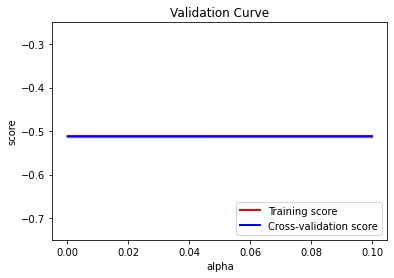

In [50]:
plotter.plot_validation_curve(parameter='alpha',ylim=(-0.75,-0.25))

It seems that there is a negligible impact of changing the value of `alpha` on the mean absolute error performance of the ridge regression model.

In [51]:
record_store_ridge_pipe['ridge'].best_score_

-0.5125456060286719

In [52]:
record_store_ridge_pipe['ridge'].best_params_

{'alpha': 0.1}

As we see from the best score we obtain above, there seems to be a very minor improvement over the performance of the Linear Regression model treated previously. We will test whether this improvement extends to the test set below.

In [53]:
record_store_ridge_pred = record_store_ridge_pipe.predict(X_te)

/usr/local/lib/python3.6/site-packages/cuml/utils/input_utils.py:188: UserWarning: Expected column ('F') major order, but got the opposite. Converting data, this will result in additional memory utilization.
  warnings.warn("Expected " + order_to_str(order) + " major order, "


In [54]:
record_store_ridge_r2 = r2_score(y_te,np.exp(record_store_ridge_pred))
record_store_ridge_r2

0.18578988017590103

In [55]:
record_store_ridge_mae = mean_absolute_error(y_te,np.exp(record_store_ridge_pred))
record_store_ridge_mae

8.347076431887459

As we can see by comparing the R2 and Mean Absolute Error scores we obtain from evaluating our model predictions on the test set, there is a negligible improvement in model performance, which leads us to conclude that our regularization efforts are not effective in predicting ``market_value``.

## Ridge - Full Information
As for Linear Regression, we will now extend the analysis of the Ridge Regression to the Full Information case, using the same model preprocessing steps as we have done for the Linear Regression model.

In [ ]:
full_information_ridge_pipe = Pipeline([
    ('processing', full_information_regression_processing),
    ('ridge', GridSearchCV(
        Ridge(normalize=False,solver='eig'),
        param_grid={
            'alpha': np.logspace(-4,-1,10),
        },
        cv=KFold(n_splits=5,shuffle=True),
        scoring='neg_mean_absolute_error',
        verbose=5,
        n_jobs=-1,
        return_train_score=True
    ))
])

In [57]:
full_information_ridge_pipe.fit(X_tr,np.log(y_tr).values)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    6.0s finished
/usr/local/lib/python3.6/site-packages/cuml/utils/input_utils.py:188: UserWarning: Expected column ('F') major order, but got the opposite. Converting data, this will result in additional memory utilization.
  warnings.warn("Expected " + order_to_str(order) + " major order, "


Pipeline(memory=None,
         steps=[('processing',
                 Pipeline(memory=None,
                          steps=[('leave_one_out_encoding',
                                  LeaveOneOutEncoder(cols=['artist', 'label',
                                                           'format_text',
                                                           'master_id',
                                                           'format_name'],
                                                     drop_invariant=False,
                                                     handle_missing='value',
                                                     handle_unknown='value',
                                                     random_state=None,
                                                     return_df=True, sigma=None,
                                                     verbose=0)),
                                 ('record_store_column_remover',
                                  Co

In [ ]:
plotter = GridSearchPlotter(full_information_ridge_pipe['ridge'])

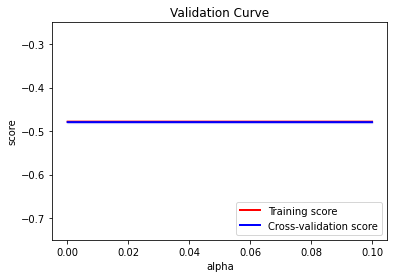

In [59]:
plotter.plot_validation_curve(parameter='alpha',ylim=(-0.75,-0.25))

In [60]:
full_information_ridge_pipe['ridge'].best_score_

-0.4794212980603689

In [61]:
full_information_ridge_pipe['ridge'].best_params_

{'alpha': 0.0001}

In [62]:
full_information_ridge_pred = full_information_ridge_pipe.predict(X_te)

/usr/local/lib/python3.6/site-packages/cuml/utils/input_utils.py:188: UserWarning: Expected column ('F') major order, but got the opposite. Converting data, this will result in additional memory utilization.
  warnings.warn("Expected " + order_to_str(order) + " major order, "


In [63]:
full_information_ridge_r2 = r2_score(y_te,np.exp(full_information_ridge_pred))
full_information_ridge_r2 

-199.826621565764

In [64]:
full_information_ridge_mae = mean_absolute_error(y_te,np.exp(full_information_ridge_pred))
full_information_ridge_mae

10.55001206738623

With full information using the Ridge Regression approach, we observe the best performance in predicting ``market_value``, but the gains continue to be marginal at best for Mean Absolute Error. It seems that under the standard regression-based approach, we cannot predict ``market_value`` effectively using record store meta-attributes, even when augmented with Discogs.com platform data.

## Random Forest
Having obtained wanting results using standard linear regression-based approaches, we will now try the Random Forest approach in order to predict ``market_value``. Random Forests are powerful algorithms that often perform better than standard regression-based approaches. However, it has been noted that Random Forests can at times have difficulties in accurately predicting outlier values. While we have tried to remove outliers as much as possible, our dataset continues to be defined by a high degree of variation, and as a result even this more sophisticated algorithm may run into issues in improving on the performance of the regression-based approaches outlined previously. 
## Random Forest - Record Store
In preparing the data for prediction with a Random Forest based model, we have to make some adjustments to our preprocessing pipeline. Firstly, we increase the scope of the features we encode via the Leave One Out method, as it keeps the dimensionality of our processed dataset lower. This is important, as high dimensionality can result in poor performance for Random Forest based models. As such, we elect to encode features we had previously dummy encoded, such as ``year``, ``country`` and ``format_name``, using the aforementioned Leave One Out encoding method. The columns that are removed from the dataset are thus adjusted to reflect this change in method.

Additionally, we cast the data to the ``np.float32`` datatype, as this is a strict requirement of the ``cuml`` RandomForestRegressor estimator.

In [ ]:
record_store_random_forest_removal_columns = [
    'market_price','units_for_sale','have','want','average_rating','rating_count','last_sold','lowest','median',
    'highest','track_titles','country','genre','style','community_have','community_want','formats','thumb_url',
    'release_url','format_description','title','release_id'
]
record_store_random_forest_removal_columns.extend(
    column_store._indicator
)
record_store_random_forest_removal_columns = set(record_store_random_forest_removal_columns)

In [ ]:
record_store_random_forest_preprocessing_pipe = Pipeline([
    ('leave_one_out_encoding', LeaveOneOutEncoder(cols=['artist','label','format_text','format_name','master_id','year','country'])),
    ('record_store_column_remover', ColumnRemover(record_store_random_forest_removal_columns)),
    ('cast_to_32', FunctionTransformer(func=lambda x: x.astype(np.float32).values))
])

random_forest = RandomForestRegressor()

record_store_random_forest_search_pipe = Pipeline([
    ('preprocessing',record_store_random_forest_preprocessing_pipe),
    ('grid_search', GridSearchCV(
        random_forest,
        cv=KFold(n_splits=5,shuffle=True),
        param_grid={
            'n_estimators': np.linspace(10,150,5).astype(int)
        },
        verbose=50,
        scoring='neg_mean_absolute_error',
        n_jobs=-1,
        return_train_score=True
    ))
])

record_store_random_forest_pipe = Pipeline([
    ('preprocessing',record_store_random_forest_preprocessing_pipe),
    ('random_forest',random_forest)
])

In [67]:
record_store_random_forest_search_pipe.fit(X_tr_sample,np.log(y_tr_sample).values.astype(np.float32))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   20.7s


/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   31.4s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   37.7s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   39.5s
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:   45.9s remaining:   14.5s
[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed:   52.1s remaining:   13.0s
[Parallel(n_jobs=-1)]: Done  21 out of  25 | elapsed:   58.4s remaining:   11.1s
[Parallel(n_jobs=-1)]: Done  22 out of  25 | elapsed:  1.0min remaining:    8.2s
[Parallel(n_jobs=-1)]: Done  23 out of  25 | elapsed:  1.1min remaining:    5.5s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.2min finished


/usr/local/lib/python3.6/site-packages/cuml/utils/input_utils.py:188: UserWarning: Expected column ('F') major order, but got the opposite. Converting data, this will result in additional memory utilization.
  warnings.warn("Expected " + order_to_str(order) + " major order, "


Pipeline(memory=None,
         steps=[('preprocessing',
                 Pipeline(memory=None,
                          steps=[('leave_one_out_encoding',
                                  LeaveOneOutEncoder(cols=['artist', 'label',
                                                           'format_text',
                                                           'format_name',
                                                           'master_id', 'year',
                                                           'country'],
                                                     drop_invariant=False,
                                                     handle_missing='value',
                                                     handle_unknown='value',
                                                     random_state=None,
                                                     return_df=True, sigma=None,
                                                     verbose=0)),
                    

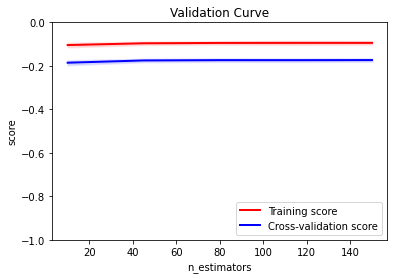

In [68]:
record_store_random_forest_plotter = GridSearchPlotter(record_store_random_forest_search_pipe.steps[-1][1])
record_store_random_forest_plotter.plot_validation_curve(parameter='n_estimators',ylim=(-1,0))

In [69]:
record_store_random_forest_search_pipe.steps[-1][1].best_score_

-0.17291705906391144

In [70]:
record_store_random_forest_search_pipe.steps[-1][1].best_params_

{'n_estimators': 150}

After tuning hyperparameters using GridSearchCV and GridSearchPlotter, we obtain excellent results using the Random Forest, with the best score obtained yielding a more than 50% reduction in the magnitude of the mean absolute error we had obtained for previous models. Accordingly, we will train the algorithm on the total dataset, and then evaluate the resulting model on the test set.

In [71]:
record_store_random_forest_pipe.fit(X_tr,np.log(y_tr).values.astype(np.float32))

/usr/local/lib/python3.6/site-packages/cuml/utils/input_utils.py:188: UserWarning: Expected column ('F') major order, but got the opposite. Converting data, this will result in additional memory utilization.
  warnings.warn("Expected " + order_to_str(order) + " major order, "


Pipeline(memory=None,
         steps=[('preprocessing',
                 Pipeline(memory=None,
                          steps=[('leave_one_out_encoding',
                                  LeaveOneOutEncoder(cols=['artist', 'label',
                                                           'format_text',
                                                           'format_name',
                                                           'master_id', 'year',
                                                           'country'],
                                                     drop_invariant=False,
                                                     handle_missing='value',
                                                     handle_unknown='value',
                                                     random_state=None,
                                                     return_df=True, sigma=None,
                                                     verbose=0)),
                    

In [72]:
record_store_random_forest_te_pred = record_store_random_forest_pipe.predict(X_te)

/usr/local/lib/python3.6/site-packages/cuml/utils/input_utils.py:188: UserWarning: Expected row ('C') major order, but got the opposite. Converting data, this will result in additional memory utilization.
  warnings.warn("Expected " + order_to_str(order) + " major order, "


In [73]:
record_store_ridge_r2 = r2_score(y_te,np.exp(record_store_random_forest_te_pred))
record_store_ridge_r2

-0.10451197752681418

In [74]:
record_store_ridge_mae = mean_absolute_error(y_te,np.exp(record_store_random_forest_te_pred))
record_store_ridge_mae

10.494488562993837

Unfortunately, it seems that when applying the Random Forest algorithm we are not able to replicate the results we obtained in cross validation. The reason for this mismatch is unclear. Unfortunately, the very strong scores on the validation set cannot be reproduced on the test set. After having run multiple tests with different randomly selected test sets, this result continues to hold. This result also holds for when the cross validation is run over the entire training dataset, which implies that this odd mismatch is not retraceable to our choice of deciding to use a smaller sample of the training dataset for cross validation purposes.
Putting the odd results in cross validation aside, which may be a quirk of the ``cuml`` library, it is clear from our results that the Random Forest does not perform well at all for our data. This is likely due to the fact that our data is highly unique across samples, which makes it difficult for the bagging approach of the Random Forest model to draw accurate decision-based inferences on the data.


## Random Forest - Full Information
Having tested the performance of the Random Forest in the Record Store scenario, we now turn our attention to the Full Information scenario. Given the small delta in performance we have observed between these scenarios for previous models, and the poor performance of the Random Forest model in the Record Store scenario, it is unlikely that we will see a significant improvement in performance.

In [ ]:
full_information_random_forest_removal_columns = record_store_random_forest_removal_columns - full_information_columns

In [ ]:
full_information_random_forest_preprocessing_pipe = Pipeline([
    ('leave_one_out_encoding', LeaveOneOutEncoder(cols=['artist','label','format_text','format_name','master_id','year','country'])),
    ('record_store_column_remover', ColumnRemover(full_information_random_forest_removal_columns)),
    ('cast_to_32', FunctionTransformer(func=lambda x: x.astype(np.float32).values))
])

full_information_random_forest_search_pipe = Pipeline([
    ('preprocessing',full_information_random_forest_preprocessing_pipe),
    ('grid_search', GridSearchCV(
        random_forest,
        cv=KFold(n_splits=5,shuffle=True),
        param_grid={
            'n_estimators': np.linspace(10,200,5).astype(int)
        },
        verbose=50,
        scoring='neg_mean_absolute_error',
        n_jobs=-1,
        return_train_score=True
    ))
])

full_information_random_forest_pipe = Pipeline([
    ('preprocessing',full_information_random_forest_preprocessing_pipe),
    ('random_forest',random_forest)
])

In [79]:
full_information_random_forest_search_pipe.fit(X_tr_sample,np.log(y_tr_sample).values.astype(np.float32))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    9.4s


/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   29.1s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   29.8s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   31.1s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   38.9s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   51.4s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   52.7s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   53.5s
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:   55.8s remaining:   17.6s
[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed:  1.3min remaining:   18.8s
[Parallel(n_jobs=-1)]: Done  21 out of  25 | elapsed:  1.4min remaining:   16.5s
[Parallel(n_jobs=-1)]: Done  22 out of  25 | elapsed:  1.5min remaining:   

/usr/local/lib/python3.6/site-packages/cuml/utils/input_utils.py:188: UserWarning: Expected column ('F') major order, but got the opposite. Converting data, this will result in additional memory utilization.
  warnings.warn("Expected " + order_to_str(order) + " major order, "


Pipeline(memory=None,
         steps=[('preprocessing',
                 Pipeline(memory=None,
                          steps=[('leave_one_out_encoding',
                                  LeaveOneOutEncoder(cols=['artist', 'label',
                                                           'format_text',
                                                           'format_name',
                                                           'master_id', 'year',
                                                           'country'],
                                                     drop_invariant=False,
                                                     handle_missing='value',
                                                     handle_unknown='value',
                                                     random_state=None,
                                                     return_df=True, sigma=None,
                                                     verbose=0)),
                    

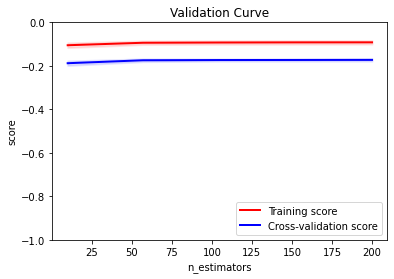

In [80]:
full_information_random_forest_plotter = GridSearchPlotter(full_information_random_forest_search_pipe.steps[-1][1])
full_information_random_forest_plotter.plot_validation_curve(parameter='n_estimators',ylim=(-1,0))

In [81]:
full_information_random_forest_search_pipe.steps[-1][1].best_score_

-0.17216259241104126

In [82]:
full_information_random_forest_search_pipe.steps[-1][1].best_params_

{'n_estimators': 200}

In [83]:
full_information_random_forest_pipe.fit(X_tr,np.log(y_tr).values.astype(np.float32))

/usr/local/lib/python3.6/site-packages/cuml/utils/input_utils.py:188: UserWarning: Expected column ('F') major order, but got the opposite. Converting data, this will result in additional memory utilization.
  warnings.warn("Expected " + order_to_str(order) + " major order, "


Pipeline(memory=None,
         steps=[('preprocessing',
                 Pipeline(memory=None,
                          steps=[('leave_one_out_encoding',
                                  LeaveOneOutEncoder(cols=['artist', 'label',
                                                           'format_text',
                                                           'format_name',
                                                           'master_id', 'year',
                                                           'country'],
                                                     drop_invariant=False,
                                                     handle_missing='value',
                                                     handle_unknown='value',
                                                     random_state=None,
                                                     return_df=True, sigma=None,
                                                     verbose=0)),
                    

In [84]:
full_information_random_forest_te_pred = full_information_random_forest_pipe.predict(X_te)

/usr/local/lib/python3.6/site-packages/cuml/utils/input_utils.py:188: UserWarning: Expected row ('C') major order, but got the opposite. Converting data, this will result in additional memory utilization.
  warnings.warn("Expected " + order_to_str(order) + " major order, "


In [85]:
full_information_ridge_r2 = r2_score(y_te,np.exp(full_information_random_forest_te_pred))
full_information_ridge_r2

-0.1039342309179967

In [86]:
full_information_ridge_mae = mean_absolute_error(y_te,np.exp(full_information_random_forest_te_pred))
full_information_ridge_mae

10.489387850785418

As we can see from the above, we see very similar results in the Full Information scenario as in the Record Store scenario. Once again, we do not observe that including the Full Information features has any positive impact on the prediction of ``market_value``, although it must be noted that this model does not perform at all well in general, and as was mentioned prior to training, an improvement was not expected.

## CatBoost
For our final attempt at predicting ``market_value`` for Jazz albums, we turn to the CatBoost algorithm. It has been developed fairly recently by Yandex Research, and has shown immense promise, as can be gathered from the following blog post: https://towardsdatascience.com/catboost-vs-light-gbm-vs-xgboost-5f93620723db.
CatBoost is ideally suited for datasets which have high incidence of categorical features, making it a good fit in theory for our use case. 
## CatBoost - Record Store
As for previous algorithms, we begin our evaluation of CatBoost by training the model using the features relevant to the Record Store scenario. For our preprocessing, we simply need to remove the columns that are not relevant for the Record Store scenario. The implementation of the CatBoost algorithm we use here allows us to specify the categorical features that we leave to the algorithm to decide how to best encode them. It has been noted that this is a highly important parameter to improve the performance of the algorithm, and as such, we include all features that are categorical in nature, even the ``country`` feature, which we have previously applied dummy encoding for.

In [ ]:
record_store_catboost_removal_columns = set([
    'market_price','units_for_sale','have','want','average_rating','rating_count','last_sold','lowest','median',
    'highest','track_titles','genre','style','community_have','community_want','formats','thumb_url',
    'release_url','format_description','title','release_id'
])
record_store_catboost_removal_columns = record_store_catboost_removal_columns.union(column_store._geography_country)

In [ ]:
record_store_catboost_processing_pipe = Pipeline([
    ('record_store_column_remover', ColumnRemover(record_store_catboost_removal_columns)),
])

catboost = CatBoostRegressor(
    random_seed=0,
    cat_features=['year','format_text','master_id','format_name','artist','label','country'],
    boosting_type='Ordered',
    n_estimators=100,
    learning_rate=0.1,
    l2_leaf_reg=3,
    border_count=170,
    max_depth=10,
)

record_store_catboost_grid_pipe = Pipeline([
    ('processing', record_store_catboost_processing_pipe),
    ('grid_search', GridSearchCV(
        catboost,
        param_grid={
            #'learning_rate': np.logspace(-3,1,5),
            #'border_count': np.linspace(1,200,5),
            'l2_leaf_reg': [1,3,5,8],
        },
        n_jobs=-1,
        cv=KFold(n_splits=5,shuffle=True),
        verbose=1,
        scoring='neg_mean_absolute_error',
        return_train_score=True)
    )
])

record_store_catboost_pipe = Pipeline([
    ('processing', record_store_catboost_processing_pipe),
    ('catboost',catboost)
])

In [89]:
record_store_catboost_grid_pipe.fit(X_tr_sample,np.log(y_tr_sample))

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  2.2min finished


0:	learn: 0.8533581	total: 207ms	remaining: 20.5s
1:	learn: 0.8349364	total: 274ms	remaining: 13.4s
2:	learn: 0.8202644	total: 391ms	remaining: 12.7s
3:	learn: 0.8050669	total: 511ms	remaining: 12.3s
4:	learn: 0.7943333	total: 524ms	remaining: 9.95s
5:	learn: 0.7834151	total: 643ms	remaining: 10.1s
6:	learn: 0.7747568	total: 762ms	remaining: 10.1s
7:	learn: 0.7674679	total: 887ms	remaining: 10.2s
8:	learn: 0.7600975	total: 1s	remaining: 10.2s
9:	learn: 0.7532601	total: 1.12s	remaining: 10.1s
10:	learn: 0.7455597	total: 1.25s	remaining: 10.1s
11:	learn: 0.7397551	total: 1.28s	remaining: 9.39s
12:	learn: 0.7344392	total: 1.34s	remaining: 8.97s
13:	learn: 0.7303275	total: 1.37s	remaining: 8.43s
14:	learn: 0.7260411	total: 1.49s	remaining: 8.44s
15:	learn: 0.7228971	total: 1.52s	remaining: 8s
16:	learn: 0.7198523	total: 1.59s	remaining: 7.76s
17:	learn: 0.7166802	total: 1.71s	remaining: 7.79s
18:	learn: 0.7152445	total: 1.72s	remaining: 7.32s
19:	learn: 0.7131030	total: 1.72s	remaining: 6.

Pipeline(memory=None,
         steps=[('processing',
                 Pipeline(memory=None,
                          steps=[('record_store_column_remover',
                                  ColumnRemover(remove_columns={'average_rating',
                                                                'community_have',
                                                                'community_want',
                                                                'country_albania',
                                                                'country_algeria',
                                                                'country_andorra',
                                                                'country_angola',
                                                                'country_argentina',
                                                                'country_armenia',
                                                                'country_aruba',
                 

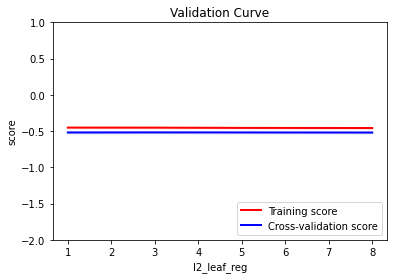

In [90]:
record_store_catboost_plot = GridSearchPlotter(record_store_catboost_grid_pipe.steps[-1][1])
record_store_catboost_plot.plot_validation_curve(parameter='l2_leaf_reg',ylim=(-2,1))

In [91]:
record_store_catboost_grid_pipe.steps[-1][1].best_score_

-0.5168456160405911

In [92]:
record_store_catboost_grid_pipe.steps[-1][1].best_params_

{'l2_leaf_reg': 3}

After searching over the hyperparameter space, we obtain cross validation results that end up looking fairly similar to those that we obtained from the Linear and Ridge regressions. This indicates that there seems to be a clear upper limit in the performance of our algorithms on our data, and that even this state of the art algorithm may not significantly improve on the performance of our previous results. 

In [93]:
record_store_catboost_pipe.fit(X_tr,np.log(y_tr))

0:	learn: 0.8431927	total: 371ms	remaining: 36.7s
1:	learn: 0.8227644	total: 665ms	remaining: 32.6s
2:	learn: 0.8051524	total: 954ms	remaining: 30.9s
3:	learn: 0.7908869	total: 1.24s	remaining: 29.7s
4:	learn: 0.7746076	total: 1.53s	remaining: 29s
5:	learn: 0.7608429	total: 1.82s	remaining: 28.5s
6:	learn: 0.7489653	total: 2.1s	remaining: 28s
7:	learn: 0.7391232	total: 2.4s	remaining: 27.6s
8:	learn: 0.7310219	total: 2.69s	remaining: 27.2s
9:	learn: 0.7237486	total: 2.98s	remaining: 26.8s
10:	learn: 0.7173364	total: 3.27s	remaining: 26.5s
11:	learn: 0.7120587	total: 3.56s	remaining: 26.1s
12:	learn: 0.7077763	total: 3.86s	remaining: 25.9s
13:	learn: 0.7007374	total: 4.16s	remaining: 25.6s
14:	learn: 0.6943509	total: 4.45s	remaining: 25.2s
15:	learn: 0.6886785	total: 4.73s	remaining: 24.8s
16:	learn: 0.6842725	total: 5.02s	remaining: 24.5s
17:	learn: 0.6806253	total: 5.31s	remaining: 24.2s
18:	learn: 0.6774947	total: 5.61s	remaining: 23.9s
19:	learn: 0.6747414	total: 5.9s	remaining: 23.

Pipeline(memory=None,
         steps=[('processing',
                 Pipeline(memory=None,
                          steps=[('record_store_column_remover',
                                  ColumnRemover(remove_columns={'average_rating',
                                                                'community_have',
                                                                'community_want',
                                                                'country_albania',
                                                                'country_algeria',
                                                                'country_andorra',
                                                                'country_angola',
                                                                'country_argentina',
                                                                'country_armenia',
                                                                'country_aruba',
                 

In [ ]:
record_store_catboost_te_pred = record_store_catboost_pipe.predict(X_te)

In [95]:
record_store_catboost_r2 = r2_score(y_te,np.exp(record_store_catboost_te_pred))
record_store_catboost_r2

0.2663216407430603

In [96]:
record_store_catboost_mae = mean_absolute_error(y_te,np.exp(record_store_catboost_te_pred))
record_store_catboost_mae

7.793003696562934

Despite the fairly similar looking results we obtained on our cross validation, we are able to improve on the performance of our best performing previous models by a decent margin, with a final mean absolute error value on our test predictions of 7.79, and an R2 of 0.267. While this performance is still far from representing a strong model for the prediction of ``market_value``, it is clear that by using the CatBoost algorithm, which is distinctly engineered to perform well for datasets with categorical features, we are able to obtain a clear improvement in performance.

## CatBoost - Full Information
Having witnessed an encouraging improvement in performance via the use of the CatBoost algorithm for our prediction problem in the Record Store scenario, we now turn to the Ful Information scenario, and attempt to identify whether a significant difference can be observed in the predictive performance of CatBoost between these two scenarios.

In [ ]:
full_information_catboost_removal_columns = record_store_catboost_removal_columns - full_information_columns

In [ ]:
full_information_catboost_processing_pipe = Pipeline([
    ('record_store_column_remover', ColumnRemover(full_information_catboost_removal_columns)),
])

full_information_catboost_grid_pipe = Pipeline([
    ('processing', full_information_catboost_processing_pipe),
    ('grid_search', GridSearchCV(
        catboost,
        param_grid={            
            #'learning_rate': np.logspace(-3,1,5),
            #'border_count': np.linspace(1,200,5),
            'l2_leaf_reg': [1,3,5,8],
        },
        n_jobs=3,
        cv=KFold(n_splits=5,shuffle=True),
        scoring='neg_mean_absolute_error',
        verbose=50,
        return_train_score=True)
    )
])

full_information_catboost_pipe = Pipeline([
    ('processing', full_information_catboost_processing_pipe),
    ('catboost',catboost)
])

In [99]:
full_information_catboost_grid_pipe.fit(X_tr_sample,np.log(y_tr_sample).values)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:   25.1s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:   26.5s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:   26.6s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:   50.5s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:   51.9s
[Parallel(n_jobs=3)]: Done   6 tasks      | elapsed:   54.6s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:  1.3min
[Parallel(n_jobs=3)]: Done   8 tasks      | elapsed:  1.3min
[Parallel(n_jobs=3)]: Done   9 tasks      | elapsed:  1.4min
[Parallel(n_jobs=3)]: Done  10 tasks      | elapsed:  1.7min
[Parallel(n_jobs=3)]: Done  11 tasks      | elapsed:  1.8min
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:  1.8min
[Parallel(n_jobs=3)]: Done  13 tasks      | elapsed:  2.2min
[Parallel(n_jobs=3)]: Done  14 tasks      | elapsed:  2.3min
[Parallel(n

Pipeline(memory=None,
         steps=[('processing',
                 Pipeline(memory=None,
                          steps=[('record_store_column_remover',
                                  ColumnRemover(remove_columns={'country_albania',
                                                                'country_algeria',
                                                                'country_andorra',
                                                                'country_angola',
                                                                'country_argentina',
                                                                'country_armenia',
                                                                'country_aruba',
                                                                'country_australia',
                                                                'country_austria',
                                                                'country_azerbaijan',
         

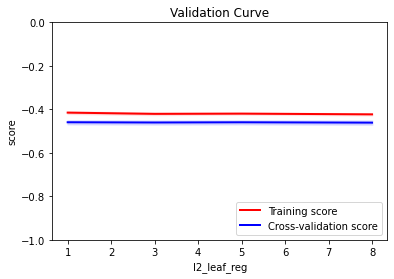

In [100]:
full_information_catboost_plot = GridSearchPlotter(full_information_catboost_grid_pipe.steps[-1][1])
full_information_catboost_plot.plot_validation_curve(parameter='l2_leaf_reg',ylim=(-1,0))

In [101]:
full_information_catboost_grid_pipe.steps[-1][1].best_score_

-0.4590229557191348

In [102]:
full_information_catboost_grid_pipe.steps[-1][1].best_params_

{'l2_leaf_reg': 1}

After having performed grid search on our hyperparameters for CatBoost, we observe that in the final stages, we obtain cross validation mean absolute error that is 0.06 lower than the cross validation mean absolute error for the Record Store scenario. This improvement in mean absolute error is a promising sign for the performance of our model on the test set.

In [103]:
full_information_catboost_pipe.fit(X_tr,np.log(y_tr))

0:	learn: 0.8334512	total: 370ms	remaining: 36.6s
1:	learn: 0.8033506	total: 734ms	remaining: 36s
2:	learn: 0.7784306	total: 1.09s	remaining: 35.3s
3:	learn: 0.7560202	total: 1.44s	remaining: 34.6s
4:	learn: 0.7374259	total: 1.79s	remaining: 33.9s
5:	learn: 0.7210361	total: 2.14s	remaining: 33.6s
6:	learn: 0.7070908	total: 2.5s	remaining: 33.2s
7:	learn: 0.6941758	total: 2.85s	remaining: 32.8s
8:	learn: 0.6825821	total: 3.21s	remaining: 32.4s
9:	learn: 0.6726462	total: 3.56s	remaining: 32s
10:	learn: 0.6634412	total: 3.91s	remaining: 31.6s
11:	learn: 0.6556994	total: 4.26s	remaining: 31.2s
12:	learn: 0.6494720	total: 4.61s	remaining: 30.9s
13:	learn: 0.6436002	total: 4.97s	remaining: 30.5s
14:	learn: 0.6382490	total: 5.33s	remaining: 30.2s
15:	learn: 0.6339431	total: 5.68s	remaining: 29.8s
16:	learn: 0.6298871	total: 6.03s	remaining: 29.4s
17:	learn: 0.6266604	total: 6.39s	remaining: 29.1s
18:	learn: 0.6220896	total: 6.76s	remaining: 28.8s
19:	learn: 0.6184277	total: 7.12s	remaining: 2

Pipeline(memory=None,
         steps=[('processing',
                 Pipeline(memory=None,
                          steps=[('record_store_column_remover',
                                  ColumnRemover(remove_columns={'country_albania',
                                                                'country_algeria',
                                                                'country_andorra',
                                                                'country_angola',
                                                                'country_argentina',
                                                                'country_armenia',
                                                                'country_aruba',
                                                                'country_australia',
                                                                'country_austria',
                                                                'country_azerbaijan',
         

In [ ]:
full_information_catboost_te_pred = full_information_catboost_pipe.predict(X_te)

In [105]:
record_store_catboost_r2 = r2_score(y_te,np.exp(full_information_catboost_te_pred))
record_store_catboost_r2

0.39308114577517295

In [106]:
record_store_catboost_mae = mean_absolute_error(y_te,np.exp(full_information_catboost_te_pred))
record_store_catboost_mae

7.135489993401015

As foreshadowed by the improvement in our cross validation mean absolute error, we observe a distinct reduction in the magnitude of our test set Mean Absolute Error for CatBoost, with a reduction of about 0.67, and a 12 point increase in R2. Unlike for previous algorithms, we can identify that the inclusion of the Full Information suite of features results in a stronger model for the prediction of ``market_value``. This is an interesting result, as for previous algorithms, we saw little to no improvement from the inclusion of these features, despite our intuition pointing towards the fact that they should, as it includes features such as ``community_have`` and ``community_want``, which reflect the supply and demand for a given album, respectively. Given that this model actually manages to perform much better than previous models, we see this change in performance via the inclusion of the Full Information features as an argument for the importance of these features in being able to predict Jazz album ``market_value``. Nonetheless, it must also be stated that even with this improvement in performance, the model still does not prove to be highly accurate in estimating the ``market_value`` of Jazz albums, which leads us to conclude that on the whole, even with the use highly sophisticated machine learning algorithms, that it is not possible to predict the market value of a Jazz album on the basis of its meta characteristics alone to an acceptable level of error.

## Identification of Feature Importances
As we are making use of the CatBoost algorithm, we benefit from being able to identify the strength of feature importances used in the model. This will allow us to more deeply understand what features in our models are proving the most useful in the prediction of ``market_value``.

In [ ]:
full_information_feature_importance_transformation_pipe = full_information_catboost_processing_pipe.fit(X_tr,np.log(y_tr).values)
record_store_feature_importance_transformation_pipe = record_store_catboost_processing_pipe.fit(X_tr,np.log(y_tr).values)
record_store_catboost_feature_importances = dict(zip(
    record_store_feature_importance_transformation_pipe.transform(X_te).columns,
    record_store_catboost_pipe.steps[-1][-1].feature_importances_
))
full_information_catboost_feature_importances = dict(zip(
    full_information_feature_importance_transformation_pipe.transform(X_te).columns,
    full_information_catboost_pipe.steps[-1][-1].feature_importances_
))

In [108]:
pd.Series(record_store_catboost_feature_importances).sort_values(ascending=False).head(20)

artist                                    20.206045
country                                   18.122346
standards_count                           14.100470
format_text                                7.640157
label                                      5.963976
year                                       5.565442
master_id                                  3.703731
superregion_americas                       3.696984
superregion_oceania                        3.423152
region_latin america and the caribbean     2.835549
superregion_unknown                        1.913944
style_Other                                1.644964
superregion_africa                         1.426456
format_description_Album                   1.331155
format_description_LP                      1.298535
format_name_other                          0.928228
superregion_europe                         0.850088
format_name_Vinyl                          0.761141
period_big_band                            0.659262
era_swing   

In [109]:
pd.Series(full_information_catboost_feature_importances).sort_values(ascending=False).head(20)

community_want                20.206045
country                       18.122346
units_for_sale                14.100470
format_name                    7.640157
label                          5.963976
year                           5.565442
community_have                 3.703731
artist                         3.696984
superregion_asia               3.423152
region_eastern asia            2.835549
superregion_europe             1.913944
average_rating                 1.644964
master_id                      1.426456
format_quantity                1.331155
format_text                    1.298535
number_of_tracks               0.928228
superregion_americas           0.850088
format_description_Reissue     0.761141
era_modern                     0.659262
format_name_CD                 0.630821
dtype: float64

From the above, we 